# <font color=#025dfa> Derin Öğrenme ile Akademik Başarı Sınıflandırması: Öğrenci Performansını Tahmin Etme - Academic Success Classification with Deep Learning: Predicting Student Performance

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, öğrenci akademik başarılarını sınıflandırmak amacıyla derin öğrenme tabanlı bir sınıflandırma modeli geliştirmeyi hedeflemektedir. Öğrencilerin ders notları, katılım düzeyleri, sınav sonuçları ve diğer akademik performans göstergeleri gibi veriler kullanılarak, öğrencilerin başarı seviyeleri belirli kategorilere ayrılacaktır. Projenin amacı, eğitim kurumlarına öğrenci performansını daha iyi analiz etme ve kişiselleştirilmiş eğitim stratejileri geliştirme konusunda yardımcı olmak, böylece eğitim kalitesini ve öğrenci başarısını artırmaktır.

EN = This project aims to develop a deep learning-based classification model to classify student academic achievement. Using data such as students' course grades, participation levels, exam results, and other academic performance indicators, students' achievement levels will be divided into specific categories. The aim of the project is to help educational institutions better analyze student performance and develop personalized educational strategies, thereby improving the quality of education and student achievement.

Kaynak/Source = https://www.kaggle.com/competitions/playground-series-s4e6/overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import nltk
import warnings
warnings.filterwarnings('ignore')
import re
import pickle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.utils import to_categorical

In [2]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [3]:
df=pd.read_csv('train.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis 

In [4]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,19,9,9,119.8,1,0,0,1,0,0,18,0,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,19,2,3,144.7,0,0,0,1,1,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,3,3,2,126.1,1,0,0,1,0,1,18,0,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,37,4,9,120.1,1,0,0,1,0,0,18,0,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [5]:
df.sample(5)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
23219,23219,1,1,1,9238,1,1,135.0,1,1,19,4,4,125.7,0,0,0,1,0,0,18,0,0,6,9,6,13.571429,0,0,6,6,6,12.500000,0,12.4,0.5,1.79,Graduate
41535,41535,1,16,5,9147,1,1,133.0,1,1,38,4,9,129.2,1,0,0,1,0,0,19,0,0,5,14,3,12.333333,0,0,5,6,4,11.000000,0,7.6,2.6,0.32,Graduate
17919,17919,1,1,2,9773,1,1,132.0,1,1,19,4,7,127.9,0,0,0,1,0,1,19,0,0,6,6,6,13.500000,0,0,6,6,6,13.666667,0,8.9,1.4,3.51,Graduate
58764,58764,1,44,1,9130,1,39,140.0,1,4,19,2,9,140.0,1,0,0,1,1,0,20,0,0,6,9,5,11.600000,0,0,6,12,4,12.500000,0,16.2,0.3,-0.92,Enrolled
10931,10931,1,44,1,9238,1,39,140.0,1,37,37,9,9,140.0,1,0,0,1,0,1,21,0,0,6,6,6,13.333333,0,0,6,7,6,12.500000,0,9.4,-0.8,-3.12,Graduate


In [6]:
df.tail()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
76513,76513,1,17,1,9254,1,1,121.0,1,19,1,7,5,116.5,1,0,0,1,0,1,18,0,0,6,9,6,10.666667,0,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,38,4,9,131.6,1,0,0,1,0,0,19,0,0,6,22,4,13.000000,0,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,37,9,10,123.3,1,0,0,1,0,0,19,0,0,5,13,4,12.500000,2,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,37,5,9,124.8,1,0,0,1,0,0,18,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout
76517,76517,1,1,1,9773,1,1,133.1,1,19,19,4,9,131.0,1,0,0,1,0,0,19,0,0,6,6,6,12.833333,0,0,6,6,6,13.666667,0,15.5,2.8,-4.06,Graduate


In [7]:
df.shape

(76518, 38)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [9]:
df.isnull().sum().sort_values(ascending=False)

id                                                0
Curricular units 2nd sem (credited)               0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (enrolled)               0
Marital status                                    0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Age at enrollment                                 0
Scholarship 

In [10]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,8.583196,8.882172,125.363971,0.569265,0.003738,0.071382,0.893646,0.315821,0.247393,22.278653,0.006626,0.188871,5.891516,7.352362,4.178520,9.995862,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,17.471591,16.803940,12.562328,0.495182,0.061023,0.257463,0.308292,0.464845,0.431500,6.889241,0.081130,1.175296,1.671776,3.508292,2.687995,5.264224,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,4.000000,5.000000,118.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.666667,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,7.000000,7.000000,124.600000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,6.000000,7.000000,5.000000,12.166667,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,132.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,23.000000,0.000000,0.000000,6.000000,9.000000,6.000000,13.314286,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [11]:
df.corr(numeric_only=True)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
id,1.000000,0.009796,-0.003956,-0.007129,0.002111,0.002192,-0.005403,-0.003635,0.002437,0.001159,-0.003199,0.007027,0.007252,-0.002445,0.005972,-0.002527,-0.005147,0.002250,-0.004084,-0.003048,-0.000624,-0.000089,-0.009064,-0.005707,-0.004012,-0.002580,-0.000801,0.003339,-0.007880,-0.001978,-0.004794,-0.001264,0.000206,-0.003217,-0.001539,0.000648,0.002916
Marital status,0.009796,1.000000,0.307324,-0.113951,0.023141,-0.323587,0.084064,-0.037717,0.004660,0.198373,0.144820,0.069695,0.054671,-0.037388,-0.216122,-0.011644,0.049145,-0.110193,0.031700,-0.075632,0.552404,-0.004286,0.039838,0.007968,0.008848,-0.107198,-0.104684,0.023511,0.037268,-0.005177,-0.021254,-0.111369,-0.111216,0.025689,-0.034481,0.019523,-0.046165
Application mode,-0.003956,0.307324,1.000000,-0.238497,0.040452,-0.354834,0.451252,-0.060636,0.005937,0.163590,0.102086,0.063062,0.045628,-0.071243,-0.323343,-0.012460,0.153215,-0.216764,0.240312,-0.209330,0.593664,0.005971,0.174309,0.045741,0.101746,-0.246015,-0.248152,0.033103,0.159977,0.013383,0.047992,-0.274728,-0.271664,0.043298,0.098439,0.005130,-0.065964
Application order,-0.007129,-0.113951,-0.238497,1.000000,0.054168,0.147153,-0.155281,-0.013956,-0.016601,-0.062138,-0.046074,-0.037192,-0.029156,-0.035714,0.347966,0.006566,-0.059187,0.064854,-0.122433,0.092768,-0.240258,-0.016731,-0.073493,0.109712,-0.029603,0.143060,0.097291,-0.018316,-0.066853,0.150224,-0.005080,0.166433,0.106326,-0.019871,-0.066022,-0.004206,0.031860
Course,0.002111,0.023141,0.040452,0.054168,1.000000,-0.041557,-0.011349,-0.069488,-0.018786,0.018063,0.022939,0.015827,0.015646,-0.089969,-0.070575,-0.014631,-0.020765,0.016522,-0.106512,0.041961,0.023751,-0.015163,-0.067790,0.576324,0.327168,0.259981,0.344706,0.012660,-0.066453,0.613658,0.328303,0.249484,0.316896,0.018007,-0.001982,0.007152,0.024719
Daytime/evening attendance,0.002192,-0.323587,-0.354834,0.147153,-0.041557,1.000000,-0.057775,0.067332,0.006357,-0.199593,-0.147777,-0.040206,-0.028313,0.016647,0.243796,0.013246,-0.028341,0.099552,-0.076996,0.105424,-0.491393,0.009799,-0.079284,0.031252,-0.007957,0.115550,0.110273,0.023854,-0.071575,0.059326,0.023615,0.120979,0.110837,-0.014665,0.063861,-0.045270,0.037908
Previous qualification,-0.005403,0.084064,0.451252,-0.155281,-0.011349,-0.057775,1.000000,0.105284,-0.010346,0.001252,-0.002976,0.011864,0.005876,0.143382,-0.127597,-0.009546,0.094983,-0.077692,0.112779,-0.081351,0.186887,-0.008985,0.150673,0.048382,0.085854,-0.044195,-0.046646,0.003897,0.128899,0.027733,0.080597,-0.069113,-0.059210,0.001979,0.130838,-0.046189,0.013527
Previous qualification (grade),-0.003635,-0.037717,-0.060636,-0.013956,-0.069488,0.067332,0.105284,1.000000,0.007707,-0.034497,-0.014052,-0.026451,-0.025917,0.561483,0.008187,-0.003748,-0.041269,0.073557,-0.060188,0.085385,-0.106581,0.015825,0.000223,0.017958,-0.061582,0.104006,0.079656,0.000599,-0.000320,0.030076,-0.048591,0.121827,0.089353,-0.011397,0.052112,0.028678,-0.053731
Nacionality,0.002437,0.004660,0.005937,-0.016601,-0.018786,0.006357,-0.010346,0.007707,1.000000,-0.024836,-0.040848,0.005132,0.004944,-0.001429,-0.012904,0.001591,0.034452,-0.012721,-

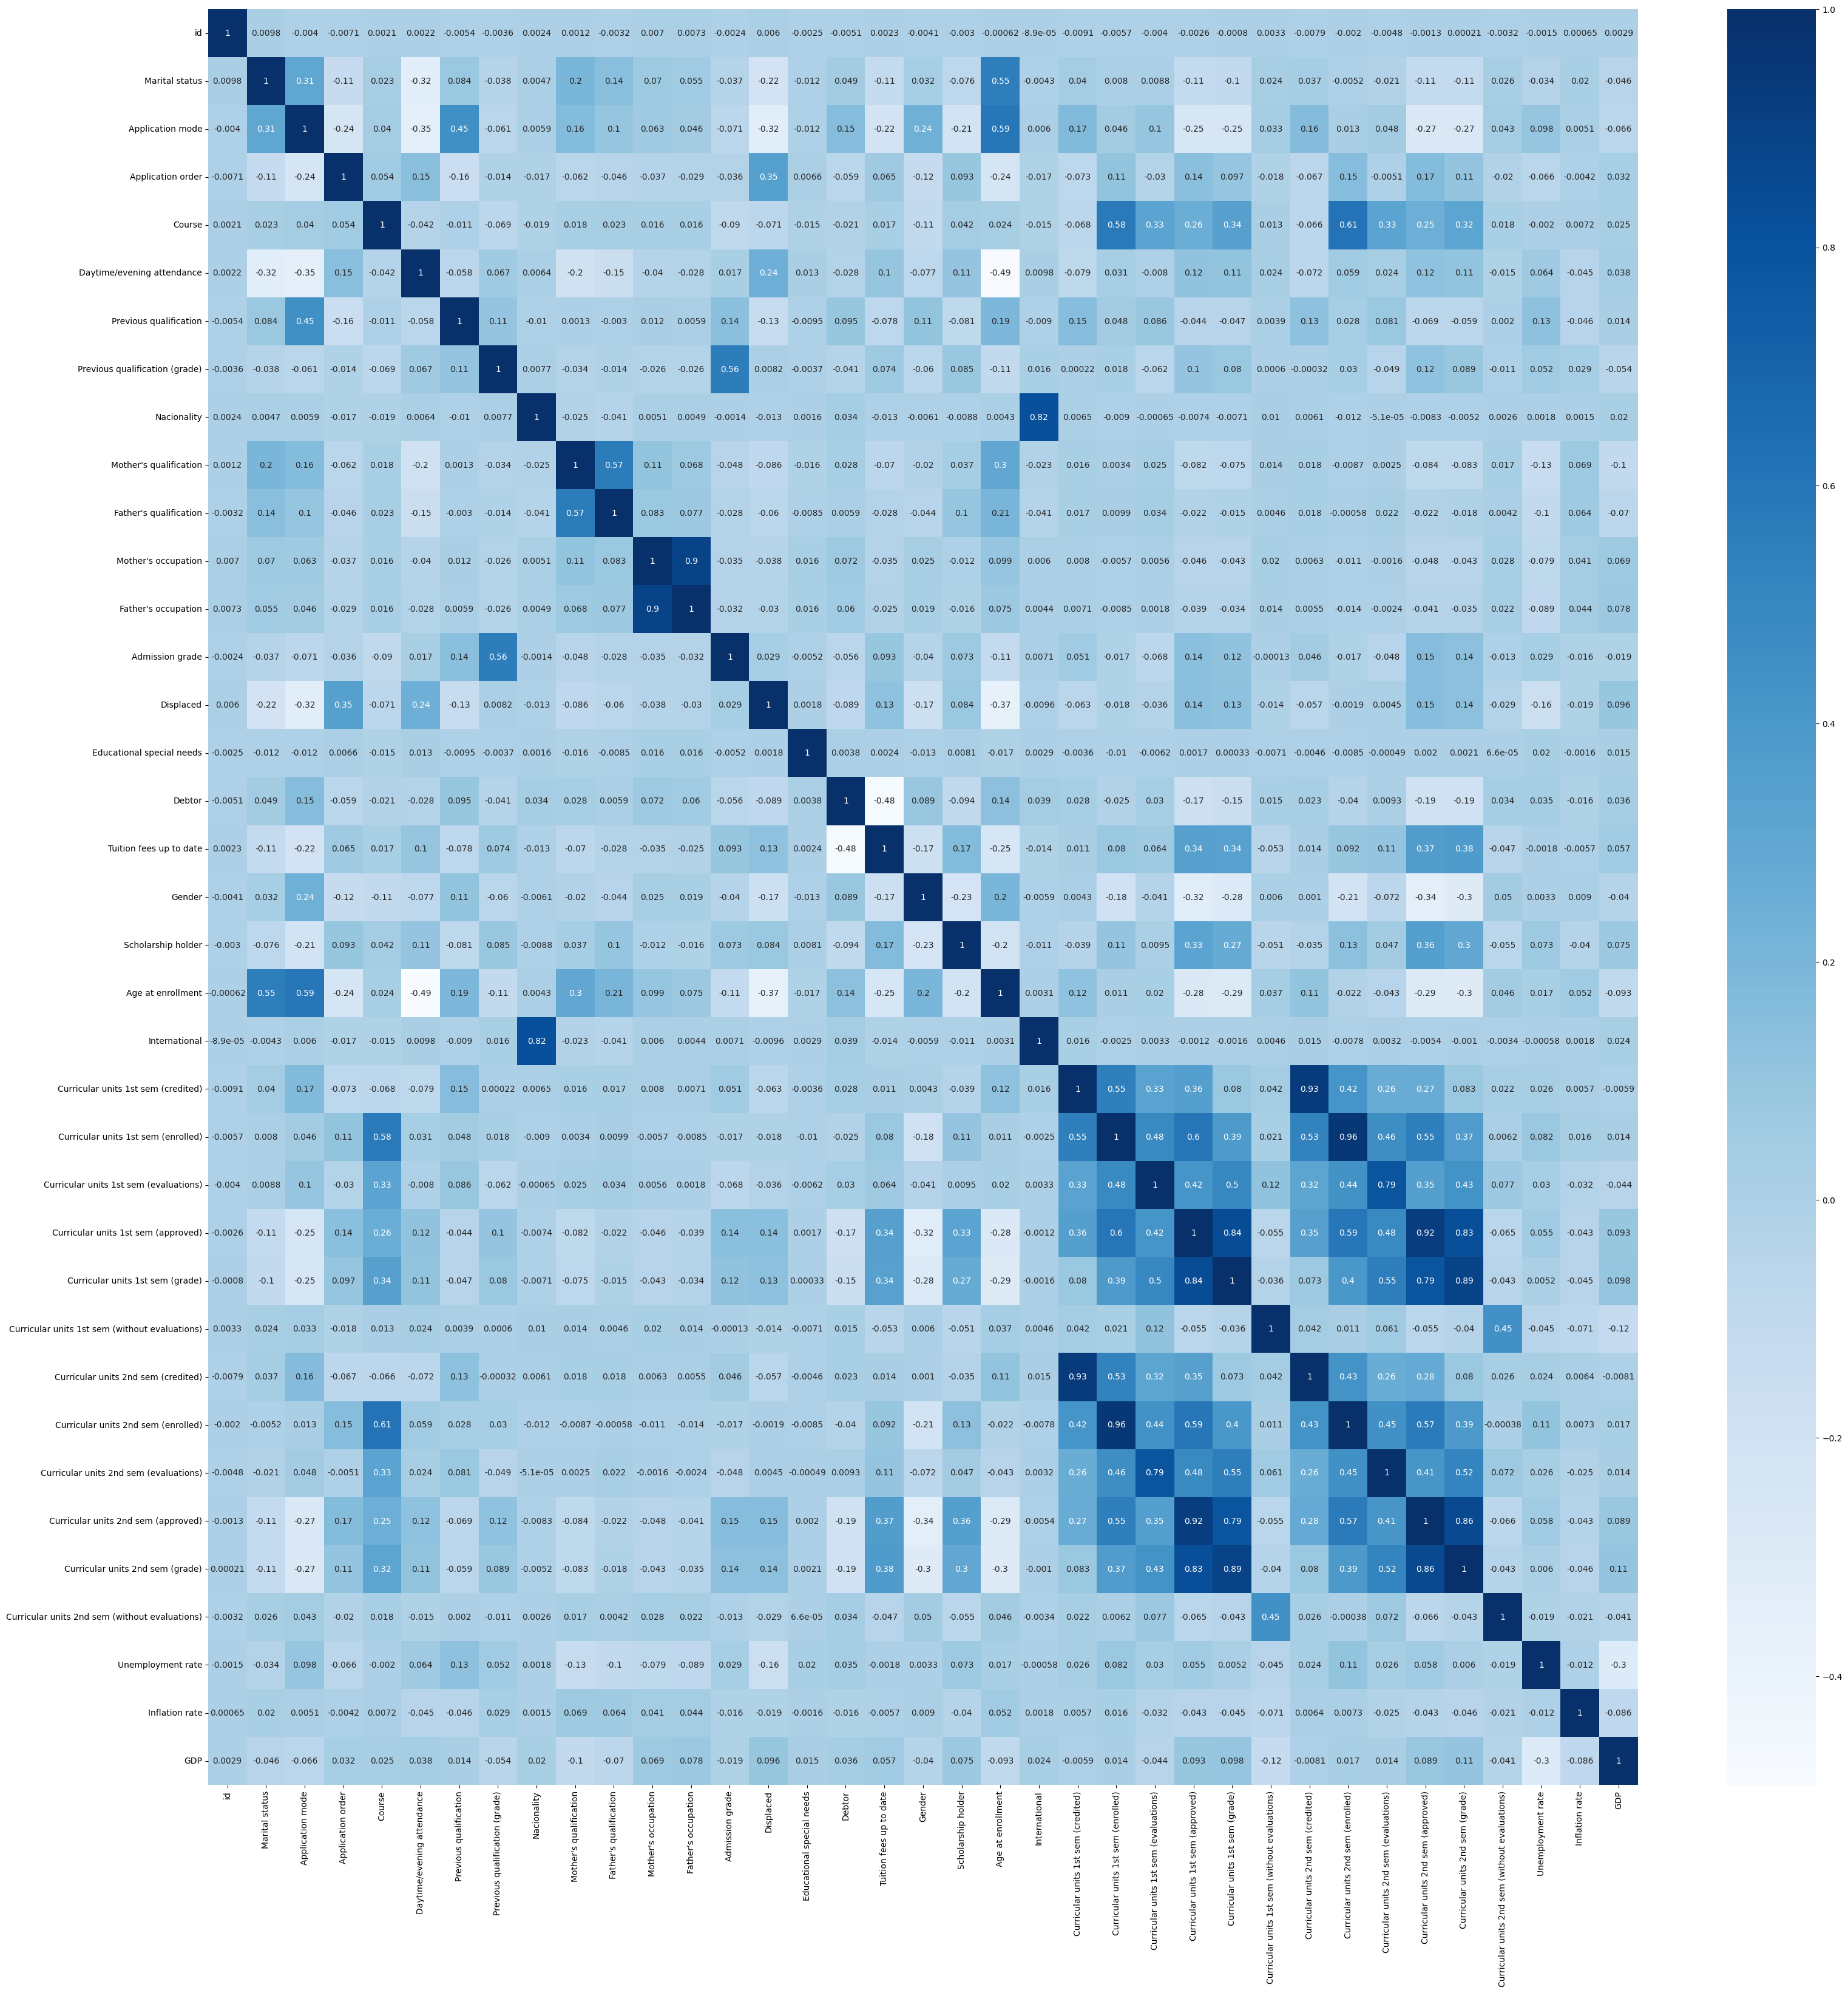

In [12]:
plt.figure(figsize=(38,38))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [13]:
df=df.drop('id',axis=1)
df.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,5,5,122.6,0,0,0,1,0,1,18,0,0,6,6,6,14.5,0,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate


In [14]:
df.columns = df.columns.str.replace(r'[\s\.]', '_', regex=True)

## <font color=#1cfc03> Aykırı Değer - Outlier

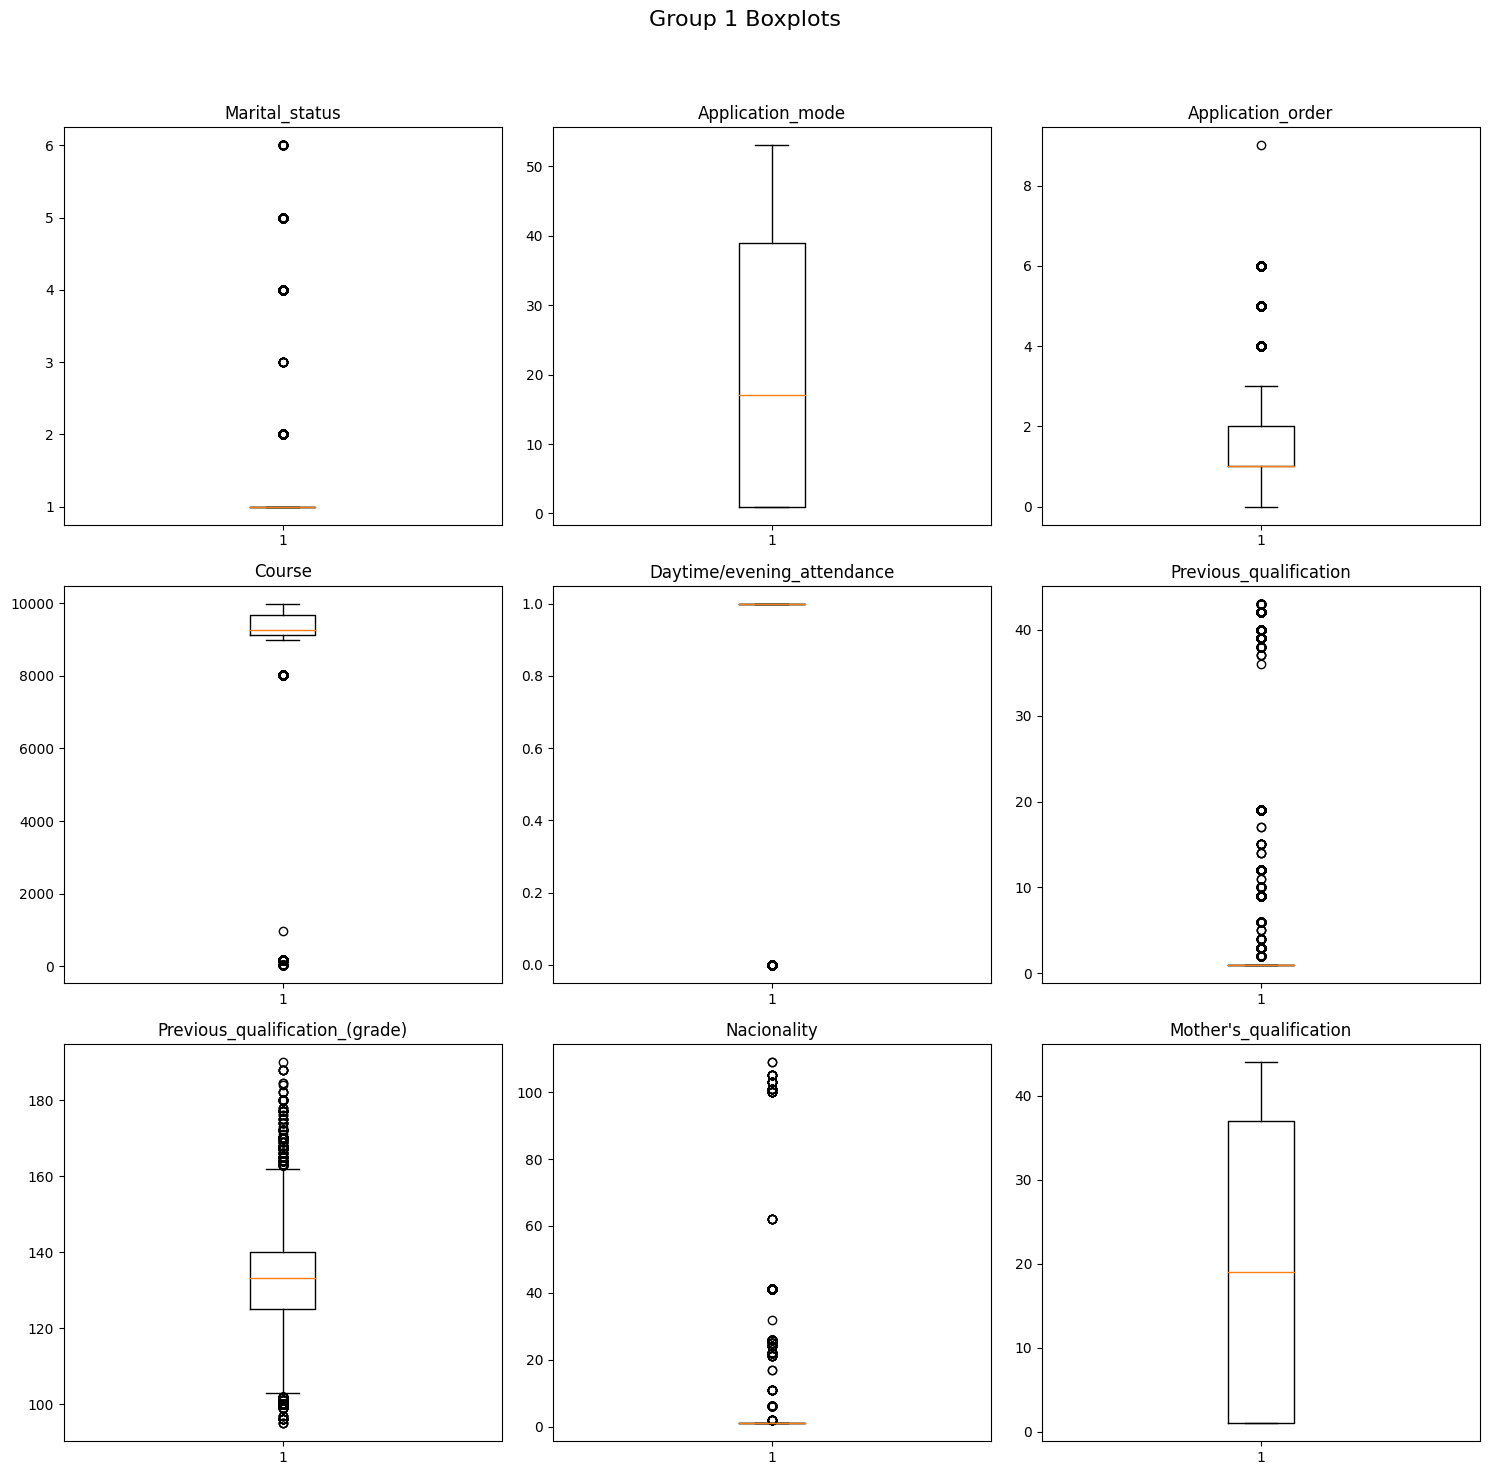

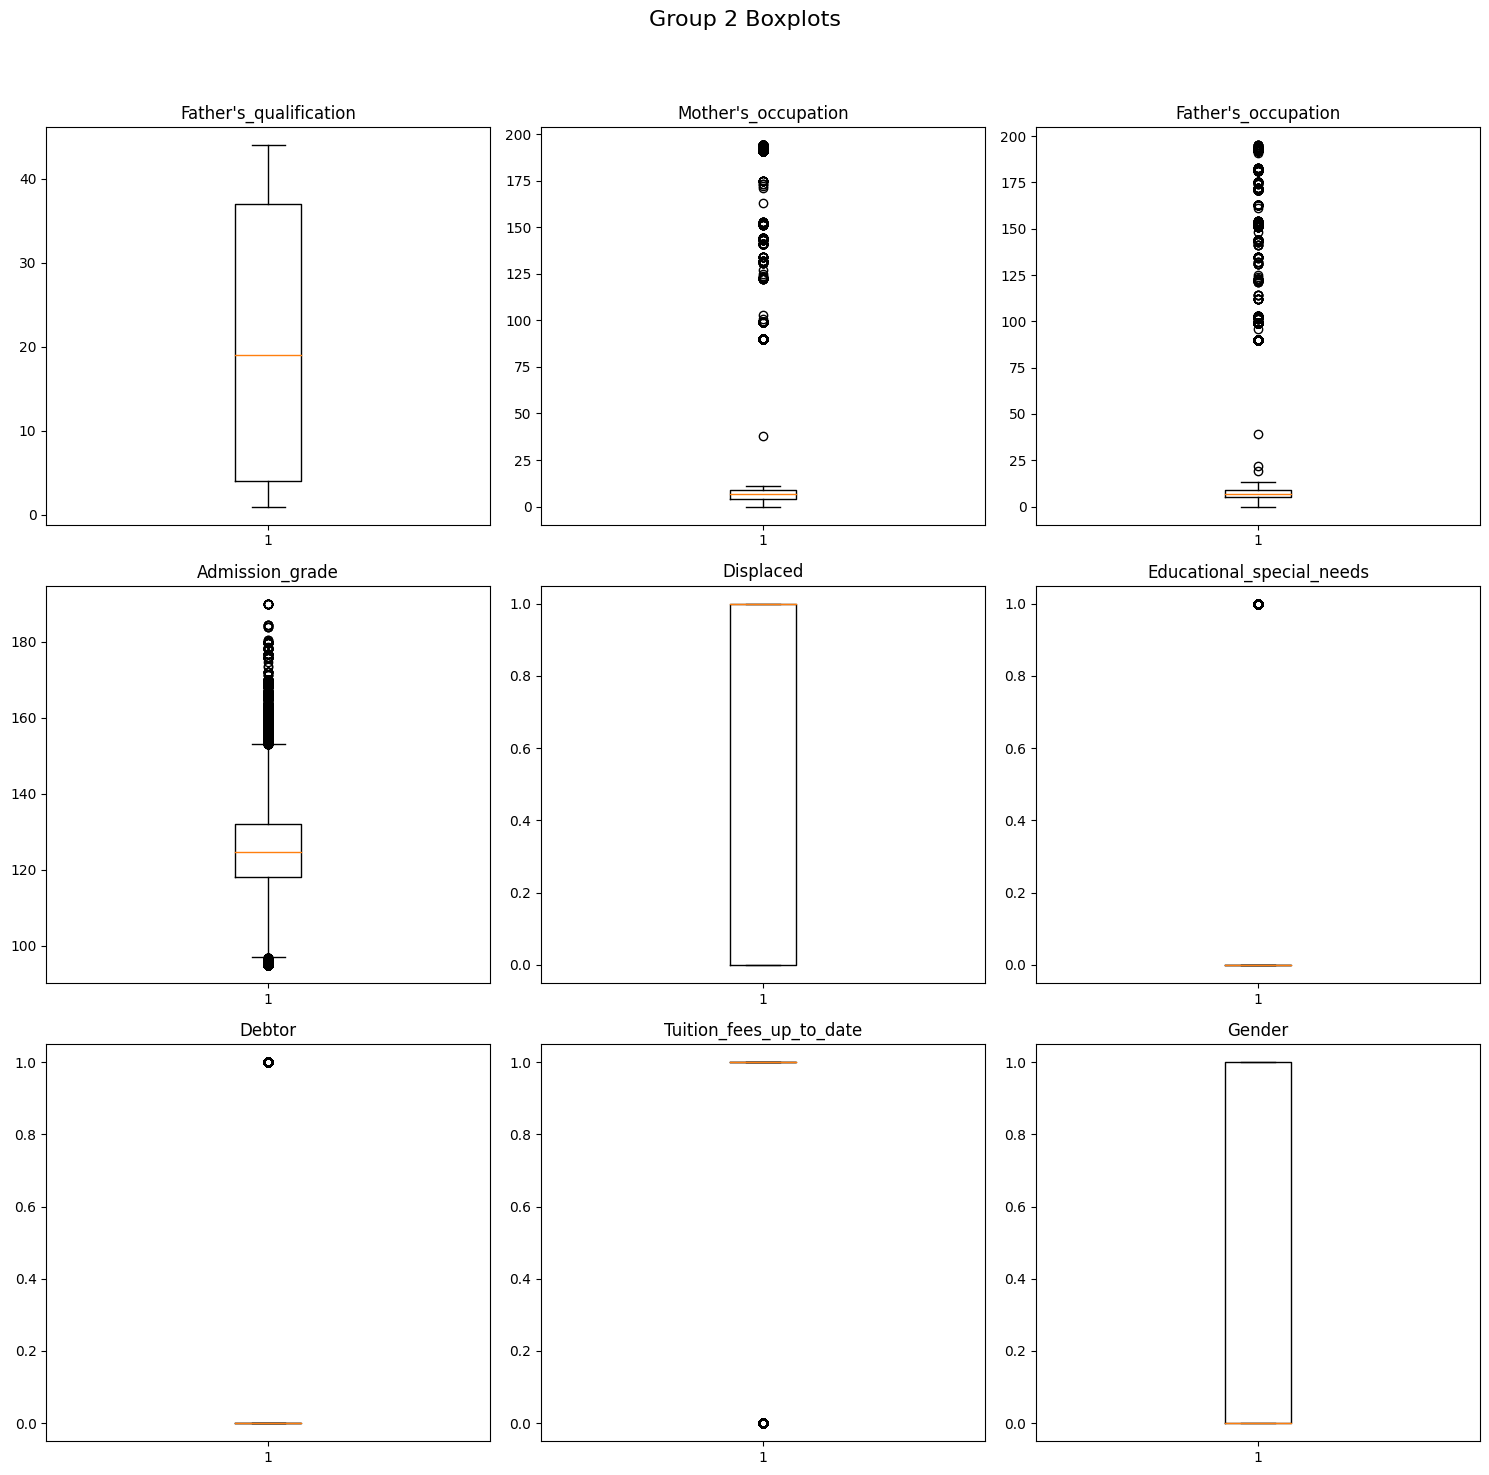

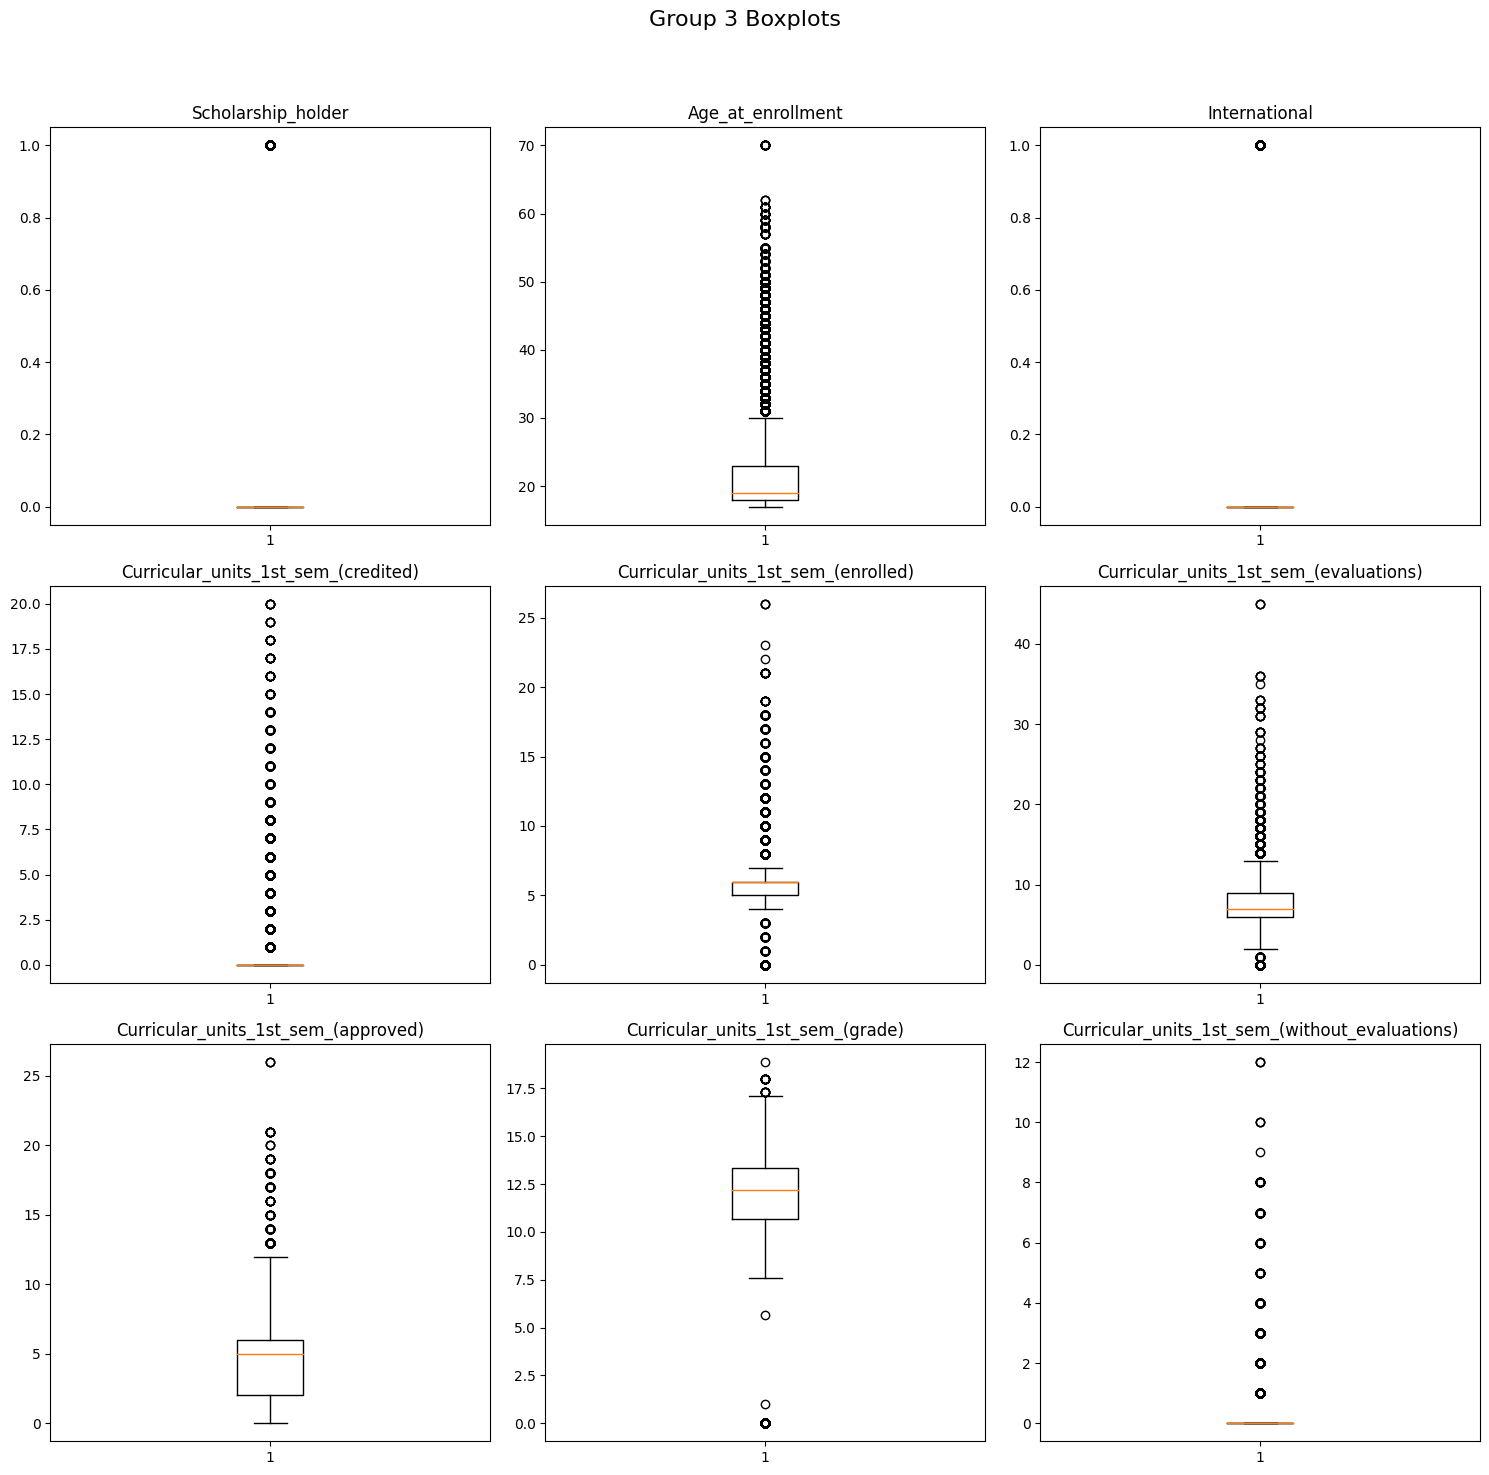

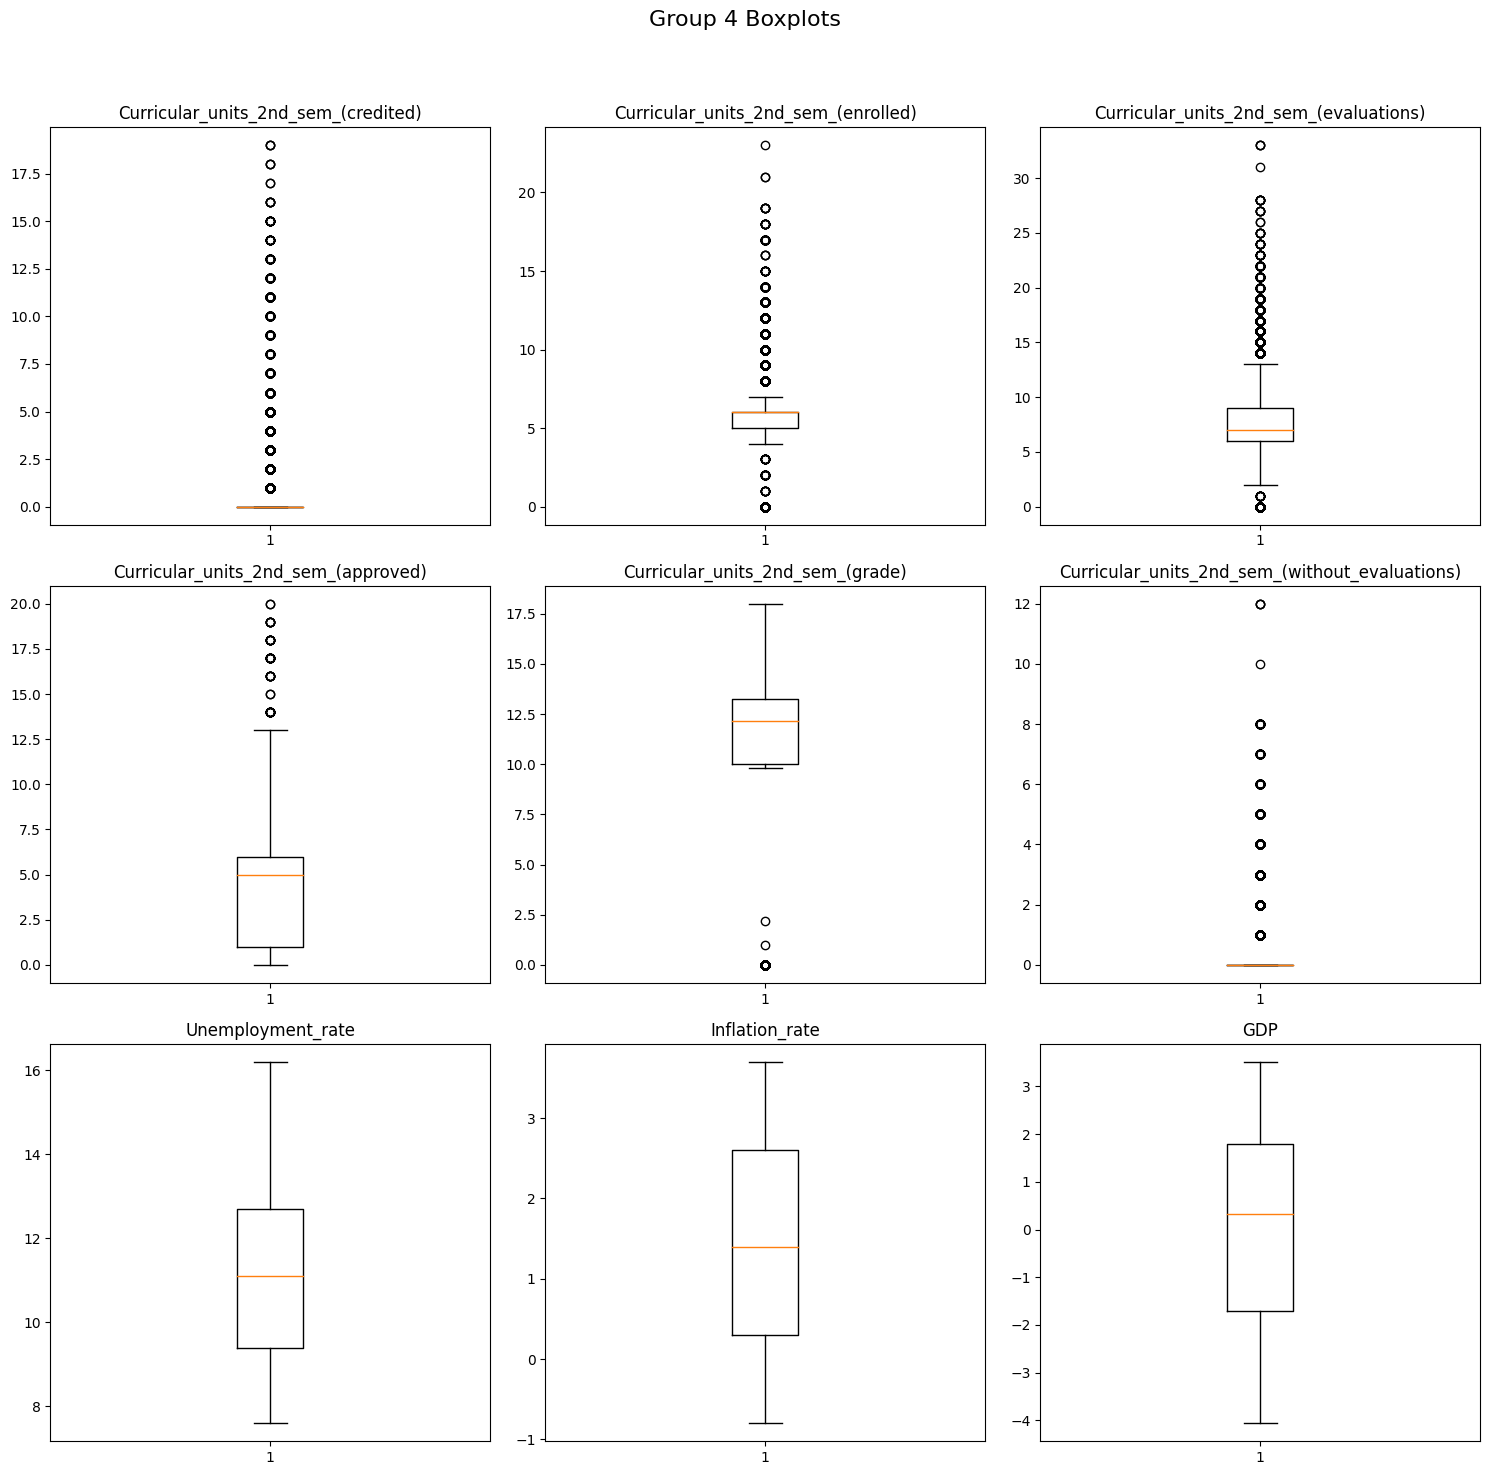

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  
# TR = Veri setindeki tüm sayısal sütunları seçer  
# EN = Selects all numeric columns in the dataset

num_cols = len(numeric_cols)  
# TR = Sayısal sütunların toplam sayısını hesaplar  
# EN = Calculates the total number of numeric columns

num_plots_per_group = 9  
# TR = Her grup için 9 grafik olacağını belirtir  
# EN = Specifies that each group will contain 9 plots

num_groups = math.ceil(num_cols / num_plots_per_group)  
# TR = Toplam grafikleri 9'luk gruplar halinde kaç grup gerektiğini hesaplar  
# EN = Calculates how many groups of 9 plots are needed for the total columns

for group in range(num_groups):  
    # TR = Her grup için döngü başlatır  
    # EN = Starts a loop for each group

    cols_in_group = numeric_cols[group * num_plots_per_group:(group + 1) * num_plots_per_group]  
    # TR = Her grup için 9 sütun seçer  
    # EN = Selects 9 columns for each group

    num_plots = len(cols_in_group)  
    # TR = Bu gruptaki toplam grafik sayısını hesaplar  
    # EN = Calculates the total number of plots in the group

    rows = math.ceil(num_plots / 3)  
    # TR = Her grafiğin 3 sütun olacak şekilde kaç satırda yer alacağını belirler  
    # EN = Determines how many rows are needed for 3 columns of plots

    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))  
    # TR = Grafik alt pencereleri (subplots) oluşturur  
    # EN = Creates the subplots for the group

    axs = axs.flatten() if num_plots > 1 else [axs]  
    # TR = Grafik pencerelerini düzleştirir (eğer tek değilse)  
    # EN = Flattens the plot axes (if there’s more than one)

    for i, col in enumerate(cols_in_group):  
        # TR = Her sütun için döngü başlatır  
        # EN = Loops through each column in the group

        axs[i].boxplot(df[col].dropna())  
        # TR = Veri setindeki ilgili sütunun aykırı değerlerini gösteren kutu grafiği oluşturur  
        # EN = Creates a boxplot for the column to show outliers

        axs[i].set_title(col)  
        # TR = Her grafiğe başlık ekler  
        # EN = Adds a title to each plot

    for i in range(num_plots, len(axs)):  
        # TR = Eğer tüm grafikler kullanılmadıysa, fazla olanları gizler  
        # EN = Hides any unused axes if there are fewer plots than subplots

        axs[i].set_visible(False)  

    plt.suptitle(f'Group {group + 1} Boxplots', fontsize=16)  
    # TR = Grup başlığı ekler  
    # EN = Adds a title for the group of boxplots

    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    # TR = Grafiklerin düzenli görünmesini sağlar  
    # EN = Ensures the layout is clean and well-organized

In [16]:
# TR = Aykırı değer çok fazla olduğu için işlem yapmadık. 
# EN = We did not take any action because there were too many outliers.

## <font color=#e0c510> Verileri Görşelleştirme - Visualizing Data me

In [17]:
#for column in df.columns:
    # TR = Verideki her bir sütun için döngü başlatılıyor  
    # EN = Loops through each column in the dataframe

#    print(f"\nSütun: {column}")  
    # TR = Sütun ismi ekrana yazdırılıyor  
    # EN = Prints the column name

#    unique = df[column].dropna().unique()  
    # TR = NaN değerleri düşürerek benzersiz değerler elde ediliyor  
    # EN = Gets the unique values after dropping NaN values

#    if pd.api.types.is_numeric_dtype(df[column]):  
        # TR = Eğer sütundaki değerler sayısal ise, değerler sıralanıyor  
        # EN = If the column is of numeric type, the unique values are sorted
#        unique = sorted(unique)
        
#    nunique = len(unique)  # Benzersiz değerlerin sayısını hesapla
    # TR = Benzersiz değerlerin sayısını hesaplar  
    # EN = Calculates the number of unique values

#    print(f"Nunique Değerler: {nunique}")  
    # TR = Benzersiz değerlerin sayısını ekrana yazdırır  
    # EN = Prints the number of unique values

#    print(f"Unique Değerler: {unique}")  
    # TR = Benzersiz değerler ekrana yazdırılıyor  
    # EN = Prints the unique values


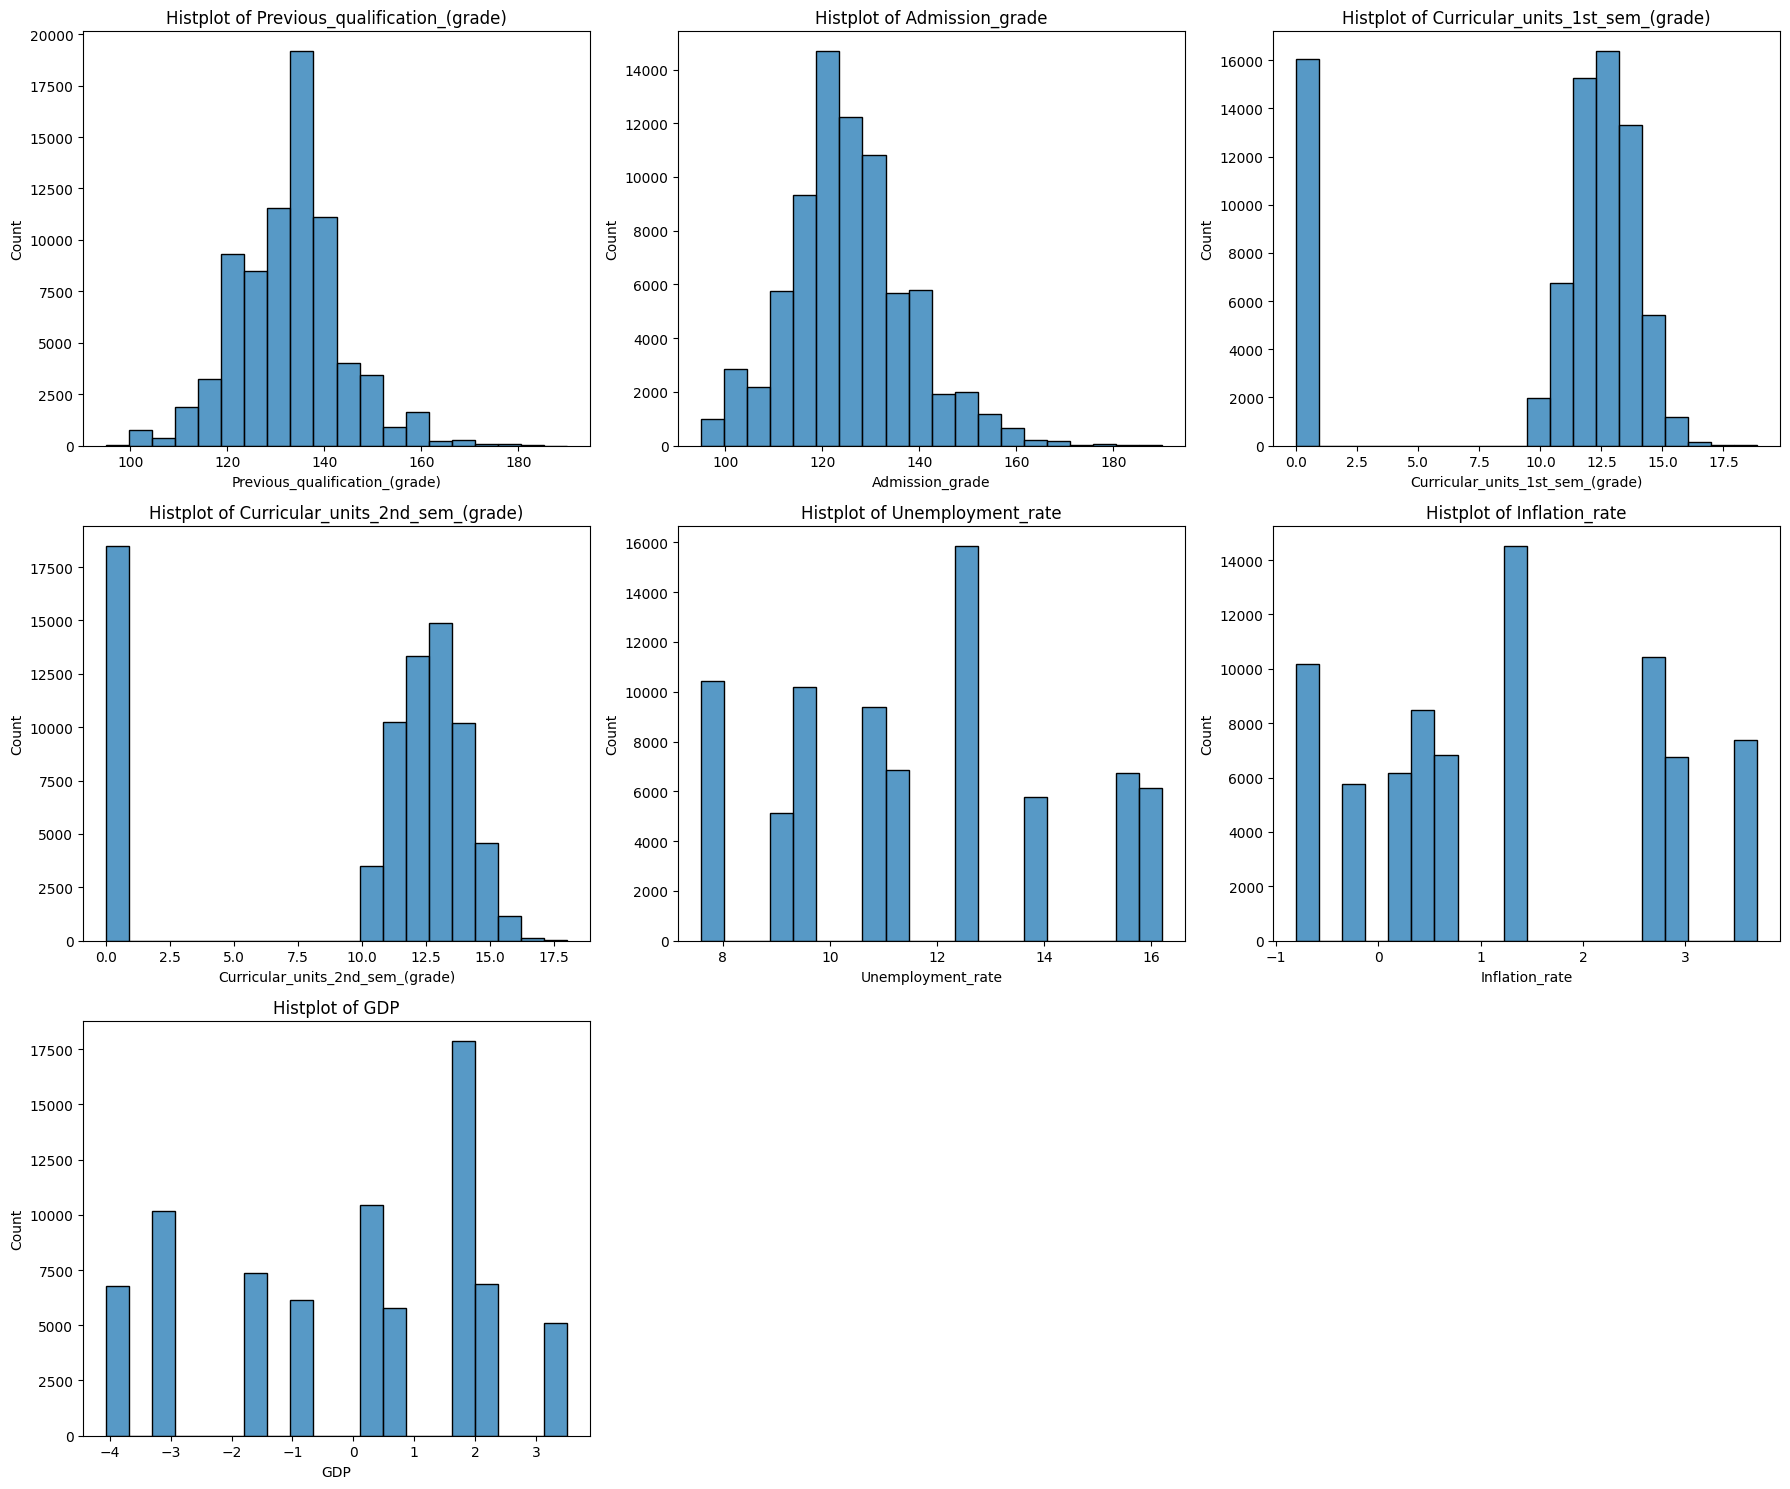

In [18]:
float_columns = df.select_dtypes(include=['float64']).columns 
# TR = Float veri türündeki sütunları alır  
# EN = Selects columns with float data type

columns = [col for col in df.columns if col in float_columns] 
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col in object_columns) istenilen kolonlara bakar.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col in object_columns) looks at the desired columns.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.histplot(data=df,x=column, bins=20, ax=axes[row, col])  
    # TR = Belirli bir değişkenin dağılımını görmek için kullanılır. Bu grafik, veri setindeki bir değişkenin frekanslarını veya yoğunluğunu analiz etmenizi sağlar.
    # EN = It is used to see the distribution of a particular variable. This plot allows you to analyze the frequencies or density of a variable in the dataset.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (bins=20) Veri ayarını 20 eşit genişlikte bölüme ayırmış olursunuz. 
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler
    
    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (bins=20) You will divide the data set into 20 equally wide sections.
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.

    axes[row, col].set_title(f'Histplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column


for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

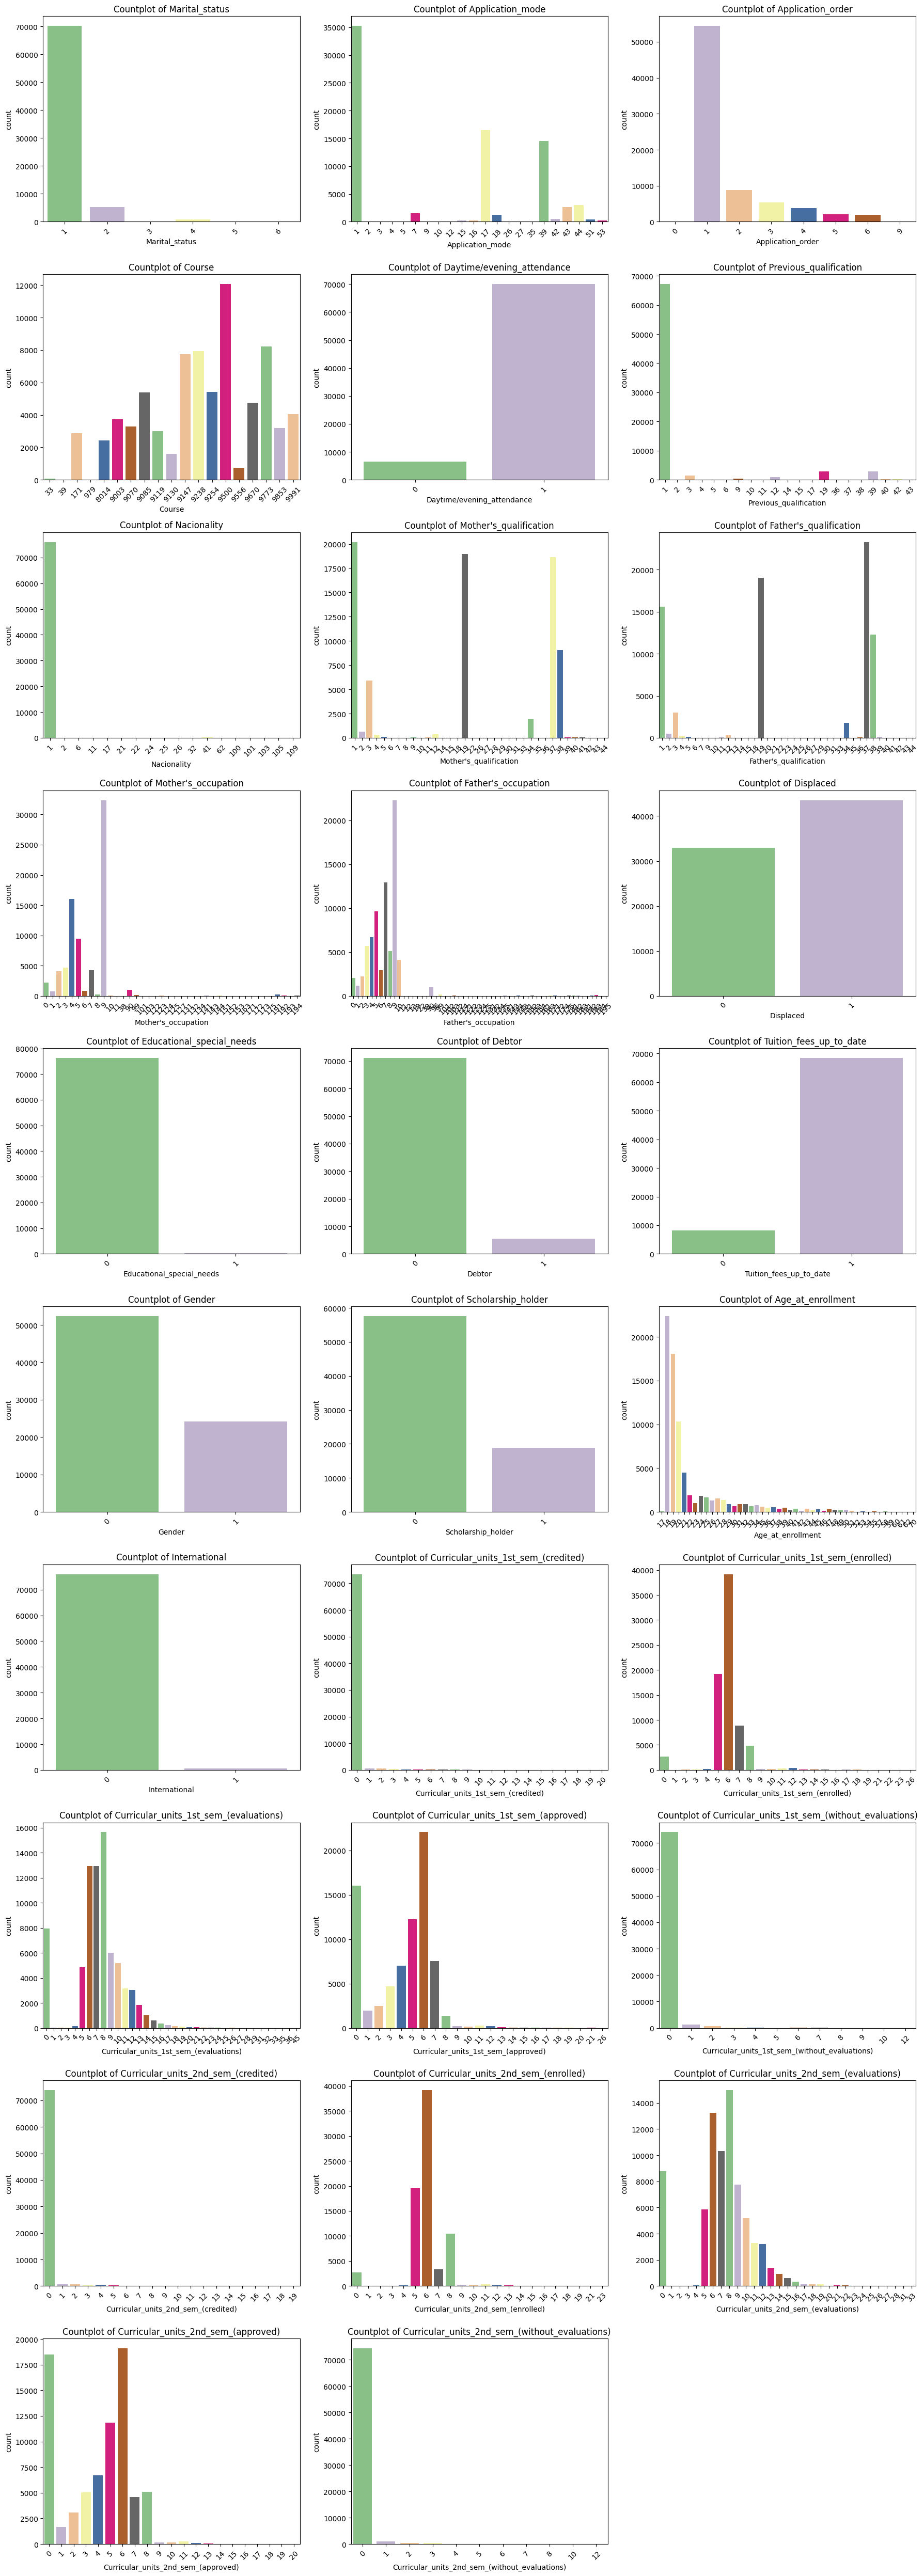

In [19]:
int_columns = df.select_dtypes(include=['int64']).columns
# TR = İnt veri türündeki sütunları alır  
# EN = Selects columns with int data type

columns = [col for col in df.columns if col in int_columns] 
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col in object_columns) istenilen kolonlara bakar.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col in object_columns) looks at the desired columns.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)
    
    sns.countplot(data=df, x=column, ax=axes[row, col],palette='Accent')
    # TR = Kategorik verilerin her bir sınıfındaki gözlem sayısını görselleştirmek için kullanılır ve her kategorinin frekansını çubuklarla gösterir.
    # EN = It is used to visualize the number of observations in each class of categorical data and shows the frequency of each category with bars.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler

    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.

    axes[row, col].set_title(f'Countplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column

    axes[row, col].tick_params(axis='x', rotation=45)
    # TR = X eksenindeki etiketlerin 45 derece döndürülmesini sağlar.
    # EN = Rotates the x-axis labels by 45 degrees.

for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

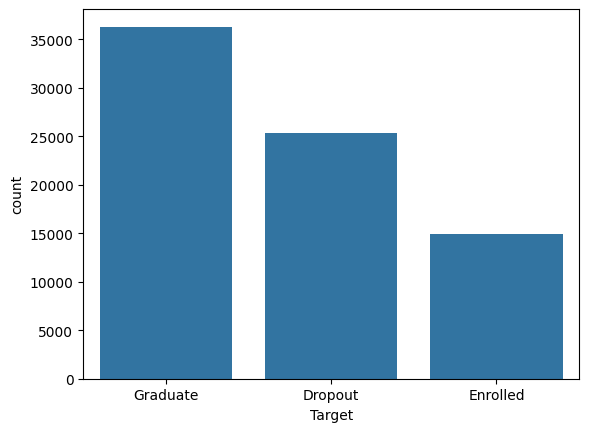

In [20]:
sns.countplot(x='Target',data=df);

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling 

In [21]:
x=df.drop('Target',axis=1)
y=df[['Target']]

In [22]:
x=pd.get_dummies(x,drop_first=True) 
y=pd.get_dummies(y) 
# Tr =  kategorik değişkenlerin sayısal değişkenlere dönüştürülmesi için kullanılır. 
# En = It is used to convert categorical variables into numerical variables.

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
# TR = modelimizi eğittik. 
# EN = We trained our model.

In [24]:
scaler = StandardScaler()
# TR = Avantajları:
# TR = Negatif ve pozitif değerler içeren verilerde performansı artırabilir.
# TR = Aykırı değerlere karşı daha dayanıklıdır.
# TR = Dezavantajları:
# TR = Veriyi kesin bir aralığa sığdırmaz (örneğin, 0 ile 1 arasında).

# EN = Advantages:
# EN = Can improve performance for data containing both negative and positive values.
# EN = More robust to outliers.
# EN = Disadvantages:
# EN = Does not fit the data into a specific range (e.g., between 0 and 1).

x_train = scaler.fit_transform(x_train)
# TR = Verileri ölçekleyerek, modelin daha hızlı ve etkili öğrenmesini sağlamak için tüm özellikleri aynı aralığa getiriyoruz.
# EN = By scaling the data, we bring all the features into the same range to allow the model to learn faster and more effectively.

x_test = scaler.transform(x_test)
# TR = Test verilerini eğitimde kullanılan aynı ölçekle dönüştürerek modelin test verileri üzerinde doğru tahminler yapmasını sağlar.
# EN = It enables the model to make accurate predictions on the test data by transforming the test data to the same scale used in training.

In [25]:
model=Sequential()
model.add(Dense(256,activation='relu'))
# TR = Bu katman, tüm giriş nöronlarına bağlantı kurar ve her nöronun ağırlıklarını öğrenir. 256 nöron var.
# Aktivasyon fonksiyonunu ReLU (Rectified Linear Unit) olarak ayarlar. ReLU fonksiyonu, negatif değerleri sıfıra dönüştürür ve pozitif değerleri olduğu gibi bırakır.
# EN = This layer connects all input neurons and learns the weights of each neuron. There are 256 neurons.
# Sets the activation function to ReLU (Rectified Linear Unit). The ReLU function converts negative values ​​to zero and leaves positive values ​​as is.

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Flatten())
# TR = Derin öğrenme modelindeki çok boyutlu (2D, 3D vb.) verileri tek boyutlu bir vektöre dönüştürür.,input_dim=x_train.shape[1]
# EN = It converts multidimensional (2D, 3D, etc.) data in the deep learning model into a one-dimensional vector.

model.add(Dense(3, activation='softmax'))
# TR = Softmax fonksiyonu, çıktıların toplamını 1'e eşitleyerek çok sınıflı sınıflandırma problemleri için kullanılır.
# EN = The softmax function is used for multi-class classification problems by normalizing the outputs to sum up to 1.

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# TR = EarlyStopping ekleyin: Eğitim sırasında model performansı iyileşmediğinde erken durması için kullanıyoruz.
# EN = Add EarlyStopping: We use it to stop early when model performance does not improve during training.

# TR = val_loss 10 epoch boyunca iyileşmezse eğitimi durduruyor ve en iyi ağırlıkları geri yüklüyor.
# EN = If val_loss does not improve for 10 epochs, it stops training and restores the best weights.

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# TR = Çok sınıflı sınıflandırma (çıktı katmanı softmax aktivasyon kullanır ve hedefler one-hot kodlanmış olmalıdır).
# TR = Tahmin edilen sınıf olasılıkları ile gerçek sınıf etiketleri arasındaki farkı ölçer.
# TR = optimizer='adam': Adam (Adaptive Moment Estimation) optimizasyon algoritması, modelin ağırlıklarını güncellerken kullanılan bir yöntemdir.
# TR = metrics=['accuracy']: Modelin performansını değerlendirmek için kullanılan bir ölçümdür. Doğru sınıflandırılan örneklerin toplam örneklere oranını hesaplar.

# EN = Multi-class classification (output layer uses softmax activation, and targets must be one-hot encoded).
# EN = Measures the difference between the predicted class probabilities and the actual class labels.
# EN = optimizer='adam': Adam (Adaptive Moment Estimation) optimization algorithm is a method used when updating the weights of the model.
# EN = metrics=['accuracy']: A metric used to evaluate the performance of the model. It calculates the ratio of correctly classified examples to total examples.

history=model.fit(x_train, y_train, validation_split=0.2, batch_size=128, epochs=100, callbacks=[early_stopping])
# TR = Modeli 100 epoch boyunca eğitiyoruz, fakat EarlyStopping ile durdurulabilir. Batch boyutu 128 olarak belirlenmiş.
# EN = We train the model for 100 epochs, but it can be stopped with EarlyStopping. Batch size is set to 128.

Epoch 1/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7858 - loss: 0.5530 - val_accuracy: 0.8176 - val_loss: 0.4697
Epoch 2/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8207 - loss: 0.4650 - val_accuracy: 0.8181 - val_loss: 0.4630
Epoch 3/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8239 - loss: 0.4520 - val_accuracy: 0.8187 - val_loss: 0.4645
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8278 - loss: 0.4445 - val_accuracy: 0.8150 - val_loss: 0.4674
Epoch 5/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8256 - loss: 0.4480 - val_accuracy: 0.8206 - val_loss: 0.4602
Epoch 6/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8303 - loss: 0.4433 - val_accuracy: 0.8163 - val_loss: 0.4664
Epoch 7/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8316 - loss: 0.4352 - val_accuracy: 0.8163 - val_loss: 0.4673
Epoch 8/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 0.4377 - val_accu

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 158,411 (618.80 KB)

 Trainable params: 52,803 (206.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 105,608 (412.54 KB)

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test)
# TR = test_loss değişkeni, test verileri üzerinde hesaplanan kayıp değerini içerir. test_acc değişkeni, test verileri üzerinde hesaplanan doğruluk değerini içerir.
# EN = The test_loss variable contains the loss value calculated on the test data. The test_acc variable contains the accuracy value calculated on the test data.

print(f"Test doğruluğu: {test_acc:.4f}")

479/479 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.8218 - loss: 0.4614
Test doğruluğu: 0.8221


In [28]:
pred=model.predict(x_test)
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.

479/479 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


In [29]:
pred

array([[2.3081547e-02, 5.9616365e-02, 9.1730207e-01],
       [9.6156538e-01, 3.7688658e-02, 7.4596849e-04],
       [2.6526624e-01, 5.0781327e-01, 2.2692055e-01],
       ...,
       [4.0423825e-02, 6.7971453e-02, 8.9160472e-01],
       [3.2591358e-02, 2.1897586e-01, 7.4843276e-01],
       [1.6555702e-02, 9.7494572e-02, 8.8594967e-01]], dtype=float32)

In [30]:
pred = np.argmax(pred, axis=1)
pred

array([2, 0, 1, ..., 2, 2, 2], dtype=int64)

In [31]:
y_test

,Target_Dropout,Target_Enrolled,Target_Graduate
41775,False,False,True
45794,True,False,False
46620,False,True,False
18945,True,False,False
38446,False,True,False
...,...,...,...
61659,False,False,True
9922,True,False,False
67011,False,False,True
51249,False,False,True


In [32]:
y_test = np.argmax(y_test, axis=1)
y_test

array([2, 0, 1, ..., 2, 2, 2], dtype=int64)

In [33]:
accuracy_score(y_test, pred)
# TR = accuracy_score fonksiyonu ile y_test, pred kullanarak sonucumuzu bulduk.
# EN = We found our result using the accuracy_score function and y_test, pred.

0.8221380031364349

In [34]:
confusion_matrix(y_test, pred)
# TR = confusion_matrix fonksiyonu ile y_test, pred kullanarak ne kadarını yanlış tahmin ettiğimizi buluyoruz
# EN = Using the confusion_matrix function and y_test, pred, we find out how much we guessed wrong.

# TR = 4 sayı değeri veriyor bize. Sol üst ve sağ alt doğru tahmin, sağ üst ve sol alt yanlış tahmin. 
# EN = It gives us 4 number values. Upper left and lower right are correct guesses, upper right and lower left are incorrect guesses.

array([[4149,  589,  290],
       [ 349, 1896,  772],
       [ 119,  603, 6537]], dtype=int64)

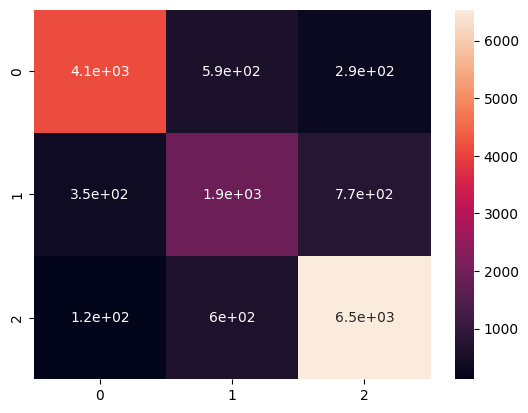

In [35]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True);
# TR = Yukarıdakinin görsel versiyonu.
# EN = Visual version of the above.

In [36]:
print(classification_report(y_test, pred))
# TR = print içinde yazdık yoksa sayıların sıralanması bozuluyor.
# EN = We wrote it in print, otherwise the order of the numbers will be disrupted.

# TR = classification_report ile y_test, pred kullanarak precision, recall, f1-score ve support ulaştık.
# EN = We achieved precision, recall, f1-score and support using classification_report and y_test, pred.

# TR = Precision (Kesinlik): Doğru olarak pozitif tahmin edilen örneklerin, toplam pozitif tahmin edilen örnekler içindeki oranını gösterir. Yani, modelin pozitif sınıfı ne kadar doğru tahmin ettiğini ölçer.
# EN = Precision (Precision): It shows the ratio of correctly predicted positive samples among the total positive predicted samples. That is, it measures how accurately the model predicts the positive class.

# TR = Recall (Duyarlılık): Gerçek pozitif örneklerin, toplam pozitif örnekler içindeki oranını gösterir. Modelin pozitif sınıfı ne kadar iyi bulduğunu ölçer.
# EN = Recall (Sensitivity): Shows the ratio of true positive samples in total positive samples. It measures how well the model finds the positive class.

# TR = F1-score: Precision ve recall'un harmonik ortalamasıdır. Hem precision hem de recall'u dikkate alarak modelin genel performansını özetler.
# EN = F1-score: It is the harmonic mean of precision and recall. It summarizes the overall performance of the model, taking into account both precision and recall.

# TR = Support: Her sınıftan kaç örneğin bulunduğunu gösterir. Yani, gerçek etiketlerde her bir sınıfa ait kaç örnek olduğunu ifade eder.
# EN = Support: Shows how many examples of each class are available. That is, it expresses how many examples of each class there are in the real labels.

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5028
           1       0.61      0.63      0.62      3017
           2       0.86      0.90      0.88      7259

    accuracy                           0.82     15304
   macro avg       0.79      0.78      0.79     15304
weighted avg       0.82      0.82      0.82     15304



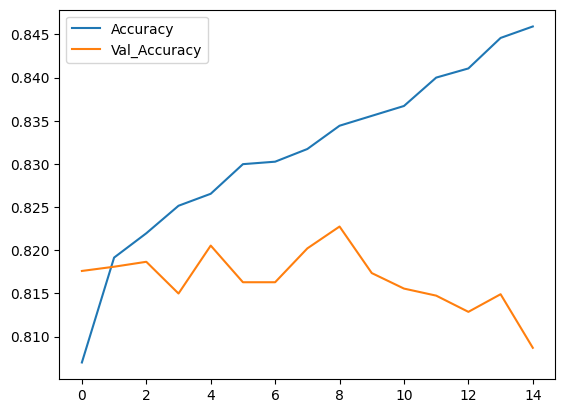

In [37]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

In [38]:
pickle.dump(model, open('Akademi.pkl', 'wb'))

pickle.dump(scaler, open('scaler.pkl', 'wb'))